<h1>Practica 1: Particionado y Naive Bayes</h1>
    
Practica realizada por Tomas Higuera Viso y Alejandro Naranjo Jimenez

Primero importamos todas las librerias que vamos a utilizar


In [1]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import *
from roc import *
from Datos import Datos
import numpy as np
import Clasificador
import EstrategiaParticionado

<h2>Particionado</h2>

En esta parte analizaremos los dos modos de particionamineto propuestos, simple y cruzado, para los tres conjuntos de datos propuestos, lenses, german y tic-tac-toe. Para realizar el analisis se mostrara los indices dedicados a train y a test en cada una de las particiones, asi como, se explicaran las ventajas y desventajas de cada particionamiento.


In [2]:
data_tic=Datos('data/tic-tac-toe.data')
data_german=Datos('data/german.data')
data_lenses=Datos('data/lenses.data')

<h3>Validacion simple</h3>

En la validacion simple se dividen los datos en train y test para unos porcentajes especificos. Dedicaremos un 60% de los datos a train y el resto, un 40% a test.


In [3]:
# Si queremos obtener los mismos resultados en las particiones sera necesario
# que especifiquemos una semilla
simple_tic=EstrategiaParticionado.ValidacionSimple(1, 60)
simple_tic.creaParticiones(data_tic)

simple_german=EstrategiaParticionado.ValidacionSimple(1, 60)
simple_german.creaParticiones(data_german) 

simple_lenses=EstrategiaParticionado.ValidacionSimple(1, 60)
simple_lenses.creaParticiones(data_lenses)

# Cada una de estas lineas creara una particion simple de los datos
# con un 60% de ellos dedicados a train y el resto a test

A continuacion mostraremos los resultados obtenidos, que no son mas que los indices dedicados a train y a test.

<h4>Particion Tic-tac-toe</h4>


In [4]:
print("Particion tic-tac-toe: ")
print("Indices train:")
print(simple_tic.particiones[0].indicesTrain)
print("\nIndices test:")
print(simple_tic.particiones[0].indicesTest)

Particion tic-tac-toe: 
Indices train:
[777 839 469 480 656 507   7 864 323 666 842 905 658 693 229 621 156 161
 772 308  55 192 831 709 266 219 159 883 467 593 888 145 401 941 391  16
 131 421 647 294 886 433 857 177 858 268 832 260 613 729 506 393 518 379
 758 673 151 780 417 321 823 670 774 141 202 881 923 292 588 257 560 775
 360 476 817 602 207 841 135 933 361 117 874 595 258 631 957  11 404 688
 307 824 636 487 849 802 566 643  89 105 943 375 186 887 844 567 953 601
 119  92 604 380 561 500 586 324 172 836 514  68 708 329 101 225  51 606
 893 801 640 629 338 390 171 816 549 408 814 803 889 262 358 765 702 599
 422 752 183 608 592 436 539 298 770 754 430 826 134 418  69 328 685  59
 203 250 535 468 920 226 591 695 776 819 538 700 895 611 398 428 437  91
 280 384 438 296 541 550  84 447 733 757 320  80 861 206 681 871  25 455
 568 503 719 382 419 435 132 288 764 834 930 249 239 529 748  75 950 872
 181 645 336 230 867 293 904 662 545 275  10 333 813 899 594  32  53 482
 150 116 642

<h4>Particion german<h4>

In [5]:
print("Particion german: ")
print("Indices train:")
print(simple_german.particiones[0].indicesTrain)
print("\nIndices test:")
print(simple_german.particiones[0].indicesTest)

Particion german: 
Indices train:
[563 313 126 351 373 967 638 637 593 509 299 478 255 975 582 608  63 578
 852 226 389 598  81 794 254 816 798 364 120 441 553 696 972 140 607 944
 480 679 547 938 558 886 957 404 171  44 891 927 330 203 987 665 960 543
 855 996 700 528 778 626 589  39 216 601 272  22 145 698 555   6 682 172
 180  88 621 790 988 820  46 705 288 942 443 349 571 803 347 269 458 363
 986 597 383   0 516 411 323 585 861 451 446 450 780 468 181 196 890 713
 470 614 324  38 484 454 710 284 153 253 664 305  54 645 936 182 912 640
 722 405 283 935 848 746 137  42 132 952 647 715  60 673  15 616 130  20
 631 483 460 174 380 225 984 488  74  17 201 164 945 377 736 342  50 487
 772 428 961 100 754 903  18 652 584 830 185  80 108 447 138 573 636 686
 788 550 871 646  11 613 950 294 265 420  51 744 981 799 609 712 462 178
 793 666 394 267  94 767 312 345  47 395 169 399 118 810 192 845 815 442
 693 808 417  75 536 753 497 302 776 838 257 729 634 173 801 864 221 863
 819 651 805 228 

<h4>Particion lenses</h4>

In [6]:
print("Particion lenses: ")
print("Indices train:")
print(simple_lenses.particiones[0].indicesTrain)
print("\nIndices test:")
print(simple_lenses.particiones[0].indicesTest)

Particion lenses: 
Indices train:
[12 13  1  8  2  4  6 21 18 11  5 16 23 20]

Indices test:
[ 0  7 14 22  3 19  9 10 17 15]


<h4>Analisis de resultados</h4>

Como se puede observar en los resultados, los indices dedicados a train son el 60% de los datos y los de test, el 40% de los datos. Esto se puede comprobar muy facilmente en la particion de lenses, que tiene 24 datos, 14 dedicados(0.6) a train y 10 dedicados a test(0.4).

<h3>Validacion cruzada</h3>

La validacion cruzada consiste en dividir los datos en k grupos, y uno de estos grupos se reserva para test y los k-1 se usan como train. Se evalua el modelo para predecir los resultados. Se realiza k veces, utilizando cada vez uno diferente para test y el resto para train.

In [7]:
#Si queremos obtener los mismos resultados en las particiones sera necesario que especifiquemos una semilla
cruzada_tic=EstrategiaParticionado.ValidacionCruzada(10)
cruzada_tic.creaParticiones(data_tic)

cruzada_german=EstrategiaParticionado.ValidacionCruzada(10)
cruzada_german.creaParticiones(data_german) 

cruzada_lenses=EstrategiaParticionado.ValidacionCruzada(10)
cruzada_lenses.creaParticiones(data_lenses)

A continuacion mostraremos los resultados obtenidos, que no son mas que los indices dedicados a train y a test.

<h4>Particion Tic-tac-toe</h4>

In [8]:
print("Particion tic-tac-toe: ")
print("Indices train:")
print(cruzada_tic.particiones[0].indicesTrain)
print("\nIndices test:")
print(cruzada_tic.particiones[0].indicesTest)

Particion tic-tac-toe: 
Indices train:
[99, 356, 97, 254, 286, 276, 643, 659, 353, 319, 809, 711, 39, 618, 464, 569, 605, 474, 572, 20, 457, 400, 704, 847, 170, 211, 125, 137, 232, 592, 267, 241, 66, 37, 617, 261, 493, 790, 610, 529, 168, 814, 779, 192, 307, 620, 311, 53, 536, 808, 450, 303, 191, 883, 253, 619, 526, 702, 61, 198, 940, 415, 304, 645, 656, 271, 87, 590, 515, 395, 265, 327, 949, 586, 426, 830, 197, 289, 305, 549, 268, 269, 875, 524, 795, 722, 239, 41, 882, 799, 404, 806, 859, 156, 212, 75, 755, 516, 111, 916, 31, 49, 953, 409, 815, 377, 313, 193, 563, 899, 5, 631, 543, 112, 217, 614, 550, 863, 957, 776, 707, 890, 348, 419, 932, 298, 813, 462, 686, 841, 113, 675, 342, 110, 744, 919, 382, 485, 86, 844, 456, 791, 840, 507, 627, 724, 646, 783, 247, 151, 441, 542, 676, 698, 654, 180, 223, 435, 690, 140, 635, 95, 837, 499, 58, 184, 421, 343, 568, 761, 595, 130, 199, 909, 312, 754, 768, 537, 440, 849, 334, 860, 822, 244, 750, 948, 438, 804, 587, 570, 230, 219, 530, 227, 22, 424,

<h4>Particion german<h4>

In [9]:
print("Particion german: ")
print("Indices train:")
print(cruzada_german.particiones[0].indicesTrain)
print("\nIndices test:")
print(cruzada_german.particiones[0].indicesTest)

Particion german: 
Indices train:
[937, 901, 738, 940, 418, 989, 183, 216, 841, 256, 293, 819, 430, 725, 115, 854, 699, 465, 400, 872, 601, 857, 244, 177, 708, 467, 36, 131, 821, 258, 853, 944, 585, 239, 337, 861, 884, 387, 647, 829, 187, 336, 224, 816, 729, 240, 501, 372, 10, 473, 178, 895, 295, 835, 765, 608, 248, 737, 552, 93, 329, 905, 357, 523, 158, 219, 691, 211, 527, 143, 268, 984, 189, 317, 11, 374, 363, 321, 153, 996, 823, 65, 123, 253, 499, 124, 37, 282, 382, 373, 280, 228, 292, 693, 25, 234, 175, 383, 830, 135, 191, 946, 917, 331, 90, 192, 289, 529, 469, 603, 959, 695, 52, 475, 717, 79, 632, 785, 883, 34, 595, 335, 159, 987, 762, 528, 371, 482, 652, 755, 464, 48, 294, 772, 928, 225, 368, 353, 262, 690, 838, 118, 876, 710, 927, 494, 73, 83, 223, 570, 957, 232, 18, 165, 581, 733, 739, 196, 588, 638, 664, 146, 510, 299, 607, 814, 991, 900, 116, 602, 5, 358, 951, 171, 16, 667, 714, 95, 736, 173, 438, 106, 516, 687, 868, 675, 534, 286, 21, 965, 300, 54, 1, 947, 862, 619, 184, 39,

<h4>Particion lenses</h4>

In [10]:
j=0
for i in cruzada_lenses.particiones:
    print("Particion lenses: ")
    print("Train index:")
    print(i.indicesTrain)
    print("\nTest index:")
    print(i.indicesTest)
    j += 1

Particion lenses: 
Train index:
[16, 19, 0, 12, 10, 7, 5, 18, 15, 11, 1, 14, 20, 6, 17, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[22, 13, 23]
Particion lenses: 
Train index:
[22, 13, 23, 12, 10, 7, 5, 18, 15, 11, 1, 14, 20, 6, 17, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[16, 19, 0]
Particion lenses: 
Train index:
[22, 13, 23, 16, 19, 0, 5, 18, 15, 11, 1, 14, 20, 6, 17, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[12, 10, 7]
Particion lenses: 
Train index:
[22, 13, 23, 16, 19, 0, 12, 10, 7, 11, 1, 14, 20, 6, 17, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[5, 18, 15]
Particion lenses: 
Train index:
[22, 13, 23, 16, 19, 0, 12, 10, 7, 5, 18, 15, 20, 6, 17, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[11, 1, 14]
Particion lenses: 
Train index:
[22, 13, 23, 16, 19, 0, 12, 10, 7, 5, 18, 15, 11, 1, 14, 2, 9, 4, 3, 21, 8, 15, 7, 0, 12, 9, 14]

Test index:
[20, 6, 17]
Particion lenses: 
Train index:
[22, 13, 23, 16, 19, 0, 12, 10, 7, 5, 18, 15

Podemos comprobar que es un buen modelo de particion ya que hace todas las posibles combinaciones y se comprueban todos tanto en test como en train.

<h2>SKLERAN VS NUESTRA IMPLEMENTACION</h2>

<h3> Validacion simple </h3>

<h3>Tic tac toe sin la correcion de la place: <h3>


In [11]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
error = clasificador_nb.validacion(estrategia,data_tic,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.30357142857142855, 0.28273809523809523, 0.3005952380952381, 0.3125, 0.2976190476190476]
Media: 0.2994
Desviación típica: 0.0097


 <h3> Tic tac toe con la correccion de laplace: <h3>

In [12]:
estrategia_laplace = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_tic,clasificador_nb_laplace)
print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))


[0.2916666666666667, 0.25297619047619047, 0.2976190476190476, 0.2708333333333333, 0.2767857142857143]
Media: 0.2780
Desviación típica: 0.0158


Ahora los resultados de SKLEARN

In [13]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=data_tic.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(data_tic.datos[:,:-1])
Y = data_tic.datos[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>


In [14]:
clf = GaussianNB()
clf.fit(x_train, y_train)
errores_gaussian = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_gaussian)

Tasa de error: 0.3160


<h4> MultinomialNB <h4>



In [15]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
errores_multinomial = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_multinomial)


Tasa de error: 0.3160


In [16]:
#Guardamos todo en una  tabla
tabla_vs_tic = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vs_tic += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vs_tic += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vs_tic += "<td>%.4f</td>" % (errores_gaussian)
tabla_vs_tic += "<td>%.4f</td></tr></table>" % (errores_multinomial)

<h3> German sin la correccion de Laplace <h3>

In [17]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
error = clasificador_nb.validacion(estrategia,data_german,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.2914285714285714, 0.24, 0.26, 0.26857142857142857, 0.2571428571428571]
Media: 0.2634
Desviación típica: 0.0168


<h3> German con la correcion de Laplace <h3>

In [18]:
estrategia_laplace = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_german,clasificador_nb_laplace)
print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))


[0.32857142857142857, 0.25142857142857145, 0.2542857142857143, 0.26, 0.23714285714285716]
Media: 0.2663
Desviación típica: 0.0320


<h3> Resultados SKLEARN <h3>

In [19]:
    encAtributos = preprocessing.OneHotEncoder(categorical_features=data_german.nominalAtributos[:-1],sparse=False)
    X = encAtributos.fit_transform(data_german.datos[:,:-1])
    Y = data_german.datos[:,-1]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>


In [20]:
clf = GaussianNB()
clf.fit(x_train, y_train)
errores_gaussian = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_gaussian)

Tasa de error: 0.2667


<h4> MultinomialNB <h4>


In [21]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
errores_multinomial = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_multinomial)

Tasa de error: 0.3500


In [22]:
#Guardamos todo en una  tabla
tabla_vs_ger = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vs_ger += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vs_ger += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vs_ger += "<td>%.4f</td>" % (errores_gaussian)
tabla_vs_ger += "<td>%.4f</td></tr></table>" % (errores_multinomial)

<h3> Lenses sin la correccion de Laplace <h3>

In [23]:
estrategia = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
error = clasificador_nb.validacion(estrategia,data_lenses,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.4444444444444444, 0.3333333333333333, 0.0, 0.1111111111111111, 0.4444444444444444]
Media: 0.2667
Desviación típica: 0.1805


/home/tomas/Clasificador.py:112: RuntimeWarning: invalid value encountered in double_scalars
  tabla[i][j]/=cont[j]


<h3> Lenses con la correccion de Laplace <h3>

In [24]:
estrategia_laplace = EstrategiaParticionado.ValidacionSimple(5, 65)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_lenses,clasificador_nb_laplace)
print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))


[0.0, 0.0, 0.2222222222222222, 0.1111111111111111, 0.4444444444444444]
Media: 0.1556
Desviación típica: 0.1663


<h3> Resultados SKLEARN <h3>

In [25]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=data_lenses.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(data_lenses.datos[:,:-1])
Y = data_lenses.datos[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>

In [26]:
clf = GaussianNB()
clf.fit(x_train, y_train)
errores_gaussian = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_gaussian)

Tasa de error: 0.5000


<h4>MultinomialNB<h4>


In [27]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
errores_multinomial = 1 - clf.score(x_test,y_test)
print("Tasa de error: %.4f" % errores_multinomial)

Tasa de error: 0.3750


In [28]:
#Guardamos todo en una  tabla
tabla_vs_len = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vs_len += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vs_len += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vs_len += "<td>%.4f</td>" % (errores_gaussian)
tabla_vs_len += "<td>%.4f</td></tr></table>" % (errores_multinomial)

<h3> Validacion Cruzada <h3>
    
<h3> Tic tac toe sin la correcion de la place <h3>

In [29]:
estrategia = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
errors = clasificador_nb.validacion(estrategia,data_tic,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.4444444444444444, 0.3333333333333333, 0.0, 0.1111111111111111, 0.4444444444444444]
Media: 0.2667
Desviación típica: 0.1805


<h3> Tic tac toe con la correcion de la place <h3>

In [30]:
estrategia_laplace = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_tic,clasificador_nb_laplace)

print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))

[0.23958333333333334, 0.2916666666666667, 0.23958333333333334, 0.3229166666666667, 0.3020833333333333, 0.2916666666666667, 0.3125, 0.28125, 0.25, 0.3020833333333333]
Media: 0.2833
Desviación típica: 0.0286


<h3> Resultados SKLEARN <h3>

In [31]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=data_tic.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(data_tic.datos[:,:-1])
Y = data_tic.datos[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>

In [32]:
clf = GaussianNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_gaussian = []
for a in aciertos:
    errores_gaussian.append(1 - a)
print("Media: %.4f" % np.mean(errores_gaussian))
print("Desviación típica: %.4f" % np.std(errores_gaussian))


Media: 0.3775
Desviación típica: 0.0960


<h4>MultinomialNB<h4>

In [33]:
clf = MultinomialNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_multinomial = []
for a in aciertos:
    errores_multinomial.append(1 - a)
print("Media: %.4f" % np.mean(errores_multinomial))
print("Desviación típica: %.4f" % np.std(errores_multinomial))

Media: 0.3349
Desviación típica: 0.0877


In [34]:
#Guardamos todo en una  tabla
tabla_vc_tic = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vc_tic += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vc_tic += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vc_tic += "<td>%.4f ± %.4f</td>" % (np.mean(errores_gaussian),np.std(errores_gaussian))
tabla_vc_tic += "<td>%.4f ± %.4f</td></tr></table>" % (np.mean(errores_multinomial),np.std(errores_multinomial))

<h3> German sin la correcion de la place <h3>

In [35]:
estrategia = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
error = clasificador_nb.validacion(estrategia,data_german,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.28, 0.28, 0.28, 0.21, 0.34, 0.22, 0.22, 0.31, 0.27, 0.3]
Media: 0.2710
Desviación típica: 0.0404


<h3> German con la correcion de la place <h3>

In [36]:
estrategia_laplace = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_german,clasificador_nb_laplace)

print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))

[0.32, 0.27, 0.21, 0.27, 0.32, 0.22, 0.37, 0.23, 0.24, 0.25]
Media: 0.2700
Desviación típica: 0.0490


<h3> Resultados SKLEARN <h3>

In [37]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=data_german.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(data_german.datos[:,:-1])
Y = data_german.datos[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>

In [38]:
clf = GaussianNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_gaussian = []
for a in aciertos:
    errores_gaussian.append(1 - a)
print("Media: %.4f" % np.mean(errores_gaussian))
print("Desviación típica: %.4f" % np.std(errores_gaussian))


Media: 0.2860
Desviación típica: 0.0341


<h4>MultinomialNB<h4>

In [39]:
clf = MultinomialNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_multinomial = []
for a in aciertos:
    errores_multinomial.append(1 - a)
print("Media: %.4f" % np.mean(errores_multinomial))
print("Desviación típica: %.4f" % np.std(errores_multinomial))

Media: 0.3650
Desviación típica: 0.0633


In [40]:
#Guardamos todo en una  tabla
tabla_vc_ger = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vc_ger += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vc_ger += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vc_ger += "<td>%.4f ± %.4f</td>" % (np.mean(errores_gaussian),np.std(errores_gaussian))
tabla_vc_ger += "<td>%.4f ± %.4f</td></tr></table>" % (np.mean(errores_multinomial),np.std(errores_multinomial))

<h3> Lenses sin la correcion de la place <h3>

In [41]:
estrategia = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb = Clasificador.ClasificadorNaiveBayes(False)
error = clasificador_nb.validacion(estrategia,data_lenses,clasificador_nb)
print(error)
print("Media: %.4f" % np.mean(error))
print("Desviación típica: %.4f" % np.std(error))

[0.6666666666666666, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0]
Media: 0.1333
Desviación típica: 0.2211


<h3> Lenses con la correcion de la place <h3>

In [42]:
estrategia_laplace = EstrategiaParticionado.ValidacionCruzada(10)
clasificador_nb_laplace = Clasificador.ClasificadorNaiveBayes(True)
error_laplace = clasificador_nb_laplace.validacion(estrategia_laplace,data_lenses,clasificador_nb_laplace)

print(error_laplace)
print("Media: %.4f" % np.mean(error_laplace))
print("Desviación típica: %.4f" % np.std(error_laplace))

[0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0]
Media: 0.0667
Desviación típica: 0.1333


<h3> Resultados SKLEARN <h3>

In [43]:
# Encode categorical integer features using a one-hot aka one-of-K scheme (categorical features)
encAtributos = preprocessing.OneHotEncoder(categorical_features=data_lenses.nominalAtributos[:-1],sparse=False)
X = encAtributos.fit_transform(data_lenses.datos[:,:-1])
Y = data_lenses.datos[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


<h4>GaussianNB<h4>

In [44]:
clf = GaussianNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_gaussian = []
for a in aciertos:
    errores_gaussian.append(1 - a)
print("Media: %.4f" % np.mean(errores_gaussian))
print("Desviación típica: %.4f" % np.std(errores_gaussian))


/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Media: 0.3417
Desviación típica: 0.3827


<h4>MultinomialNB<h4>

In [45]:
clf = MultinomialNB()
aciertos = cross_val_score(clf,X,Y,cv=10)
errores_multinomial = []
for a in aciertos:
    errores_multinomial.append(1 - a)
print("Media: %.4f" % np.mean(errores_multinomial))
print("Desviación típica: %.4f" % np.std(errores_multinomial))

Media: 0.3167
Desviación típica: 0.3958


/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [46]:
#Guardamos todo en una  tabla
tabla_vc_len = "<table><tr><th>Nuestro NB (sin laplace)</th><th>Nuestro NB (con laplace)</th><th>Sklearn GaussianNB</th><th>Sklearn MultinomialNB</th></tr>"
tabla_vc_len += "<tr><td>%.4f ± %.4f</td>" % (np.mean(error),np.std(error))
tabla_vc_len += "<td>%.4f ± %.4f</td>" % (np.mean(error_laplace),np.std(error_laplace))
tabla_vc_len += "<td>%.4f ± %.4f</td>" % (np.mean(errores_gaussian),np.std(errores_gaussian))
tabla_vc_len += "<td>%.4f ± %.4f</td></tr></table>" % (np.mean(errores_multinomial),np.std(errores_multinomial))

<h2> Analisis de los datos <h2>
    
<h3> Validacion Simple <h3>
    
<h4> Tic Tac Toe <h4>
    

In [47]:
display(HTML(tabla_vs_tic))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.2994 ± 0.0097,0.2780 ± 0.0158,0.3160,0.3160


<h4>German</h4>

In [48]:
display(HTML(tabla_vs_ger))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.2634 ± 0.0168,0.2663 ± 0.0320,0.2667,0.3500


<h4>Lenses</h4>

In [49]:
display(HTML(tabla_vs_len))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.2667 ± 0.1805,0.1556 ± 0.1663,0.5000,0.3750


<h3>Validacion cruzada</h3>

<h4>Tic tac toe</h4>

In [50]:
display(HTML(tabla_vc_tic))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.2667 ± 0.1805,0.2833 ± 0.0286,0.3775 ± 0.0960,0.3349 ± 0.0877


<h4>German</h4>

In [51]:
display(HTML(tabla_vc_ger))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.2710 ± 0.0404,0.2700 ± 0.0490,0.2860 ± 0.0341,0.3650 ± 0.0633


<h4>Lenses</h4>

In [52]:
display(HTML(tabla_vc_len))

Nuestro NB (sin laplace),Nuestro NB (con laplace),Sklearn GaussianNB,Sklearn MultinomialNB
0.1333 ± 0.2211,0.0667 ± 0.1333,0.3417 ± 0.3827,0.3167 ± 0.3958


Los resultados obtenidos son muy similares a los de las funciones implementadas en la libreria sklearn (GaussianNB y MultinomialNB).
La unica diferencia notable la podemos encontrar en la ejecucion de validacion cruzada con los datos lenses.data, en la que nuestro error es notablemente menor que el de las librerias sklearn. Creemos que esto se puede deber a que la ejecucion ha sido muy positiva, ya que en el resto de situaciones los errores son parecidos.

<h2>Curvas ROC</h2>

Una curva ROC no es mas que una medicion de la precision de un clasificador.

<h3>Tic tac toe</h3>

<h4>Validacion simple</h4>



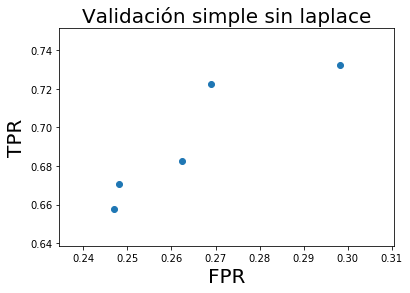

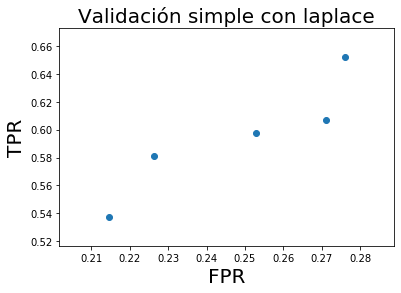

In [53]:
roc, roc_lp = roc_valsimple(data_tic)

Sin laplace

In [54]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc[0,0], roc[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc[1,0], roc[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
265,344
118,953


Con laplace

In [55]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_lp[0,0], roc_lp[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_lp[1,0], roc_lp[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
264,307
180,929


<h4>Validacion cruzada</h4>

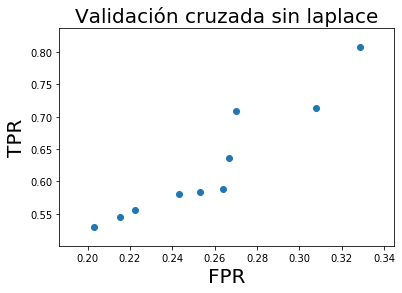

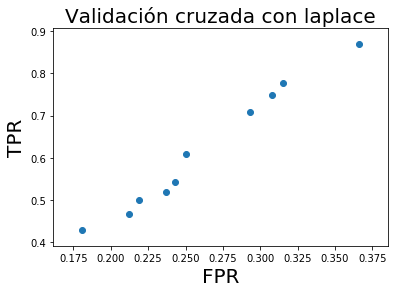

In [56]:
roc_c, roc_c_lp = roc_valcruzada(data_tic)

Sin laplace

In [57]:
tabla_confusion_c = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c[0,0], roc_c[0,1])
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c[1,0], roc_c[1,1])

display(HTML(tabla_confusion_c))

Matriz,de confusión
145,187
86,542


Con laplace

In [58]:
tabla_confusion_c_lp = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c_lp[0,0], roc_c_lp[0,1])
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c_lp[1,0], roc_c_lp[1,1])

display(HTML(tabla_confusion_c_lp))

Matriz,de confusión
140,192
90,538


<h3>German</h3>

<h4>Validacion simple</h4>

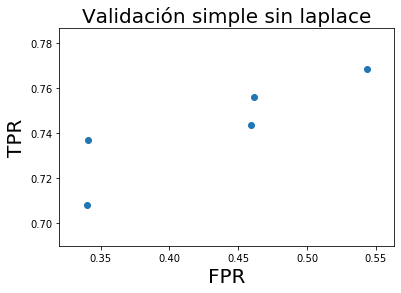

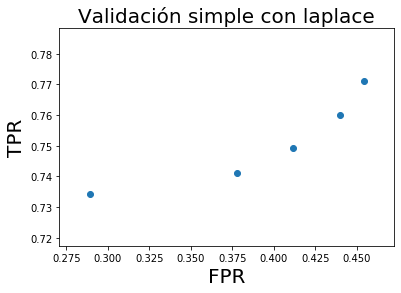

In [59]:
roc, roc_lp = roc_valsimple(data_german)

Sin laplace

In [60]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc[0,0], roc[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc[1,0], roc[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
1109,110
385,146


Con laplace

In [61]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_lp[0,0], roc_lp[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_lp[1,0], roc_lp[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
1138,93
377,142


<h4>Validacion cruzada</h4>

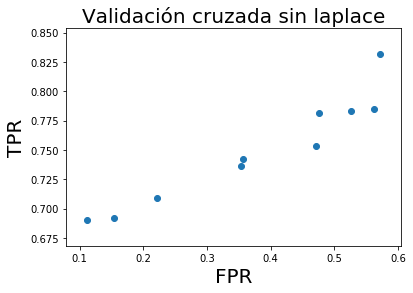

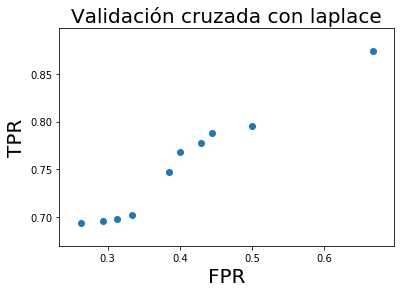

In [62]:
roc_c, roc_c_lp = roc_valcruzada(data_german)

Sin laplace

In [63]:
tabla_confusion_c = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c[0,0], roc_c[0,1])
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c[1,0], roc_c[1,1])

display(HTML(tabla_confusion_c))

Matriz,de confusión
643,57
215,85


Con laplace

In [64]:
tabla_confusion_c_lp = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c_lp[0,0], roc_c_lp[0,1])
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c_lp[1,0], roc_c_lp[1,1])

display(HTML(tabla_confusion_c_lp))

Matriz,de confusión
643,57
210,90


<h3>Lenses</h3>

<h4>Validacion simple</h4>

/home/tomas/Clasificador.py:112: RuntimeWarning: invalid value encountered in double_scalars
  tabla[i][j]/=cont[j]


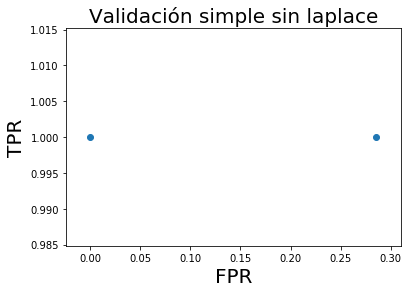

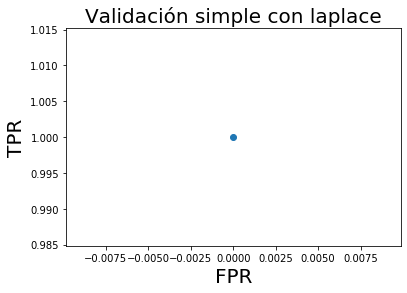

In [65]:
roc, roc_lp = roc_valsimple(data_lenses)

Sin laplace

In [66]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc[0,0], roc[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc[1,0], roc[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
4,2
0,12


Con laplace

In [67]:
tabla_confusion = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_lp[0,0], roc_lp[0,1])
tabla_confusion += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_lp[1,0], roc_lp[1,1])

display(HTML(tabla_confusion))

Matriz,de confusión
1,0
0,8


<h4>Validacion cruzada</h4>

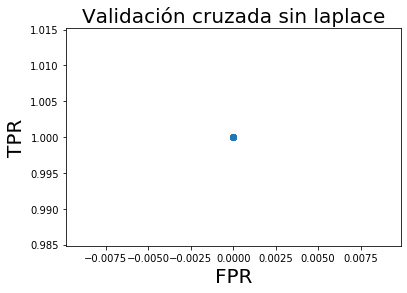

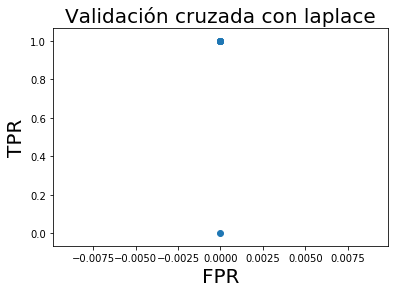

In [68]:
roc_c, roc_c_lp = roc_valcruzada(data_lenses)

Sin laplace

In [69]:
tabla_confusion_c = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c[0,0], roc_c[0,1])
tabla_confusion_c += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c[1,0], roc_c[1,1])

display(HTML(tabla_confusion_c))

Matriz,de confusión
6,0
0,9


Con laplace

In [71]:
tabla_confusion_c_lp = "<table><tr><th>Matriz</th><th>de confusión</th></tr>"
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr>" % (roc_c_lp[0,0], roc_c_lp[0,1])
tabla_confusion_c_lp += "<tr><td>%ld</td><td>%ld</td></tr></table>" % (roc_c_lp[1,0], roc_c_lp[1,1])

display(HTML(tabla_confusion_c_lp))

Matriz,de confusión
9,0
1,11


<h3>Consideraciones</h3>

Se produce un warning a la hora de utilizar las librerias de sklearn. Este no afecta a la implementacion del codigo, y al no conseguir quitarlo lo hemos dejado como estaba.

<h5>Practica realizada por Tomas Higuera Viso y Alejandro Naranjo Jimenez</h5>